In [1]:
import pandas as pd       
import numpy as np
import csv

from nltk.corpus import stopwords # Import the stop word list
import nltk
from bs4 import BeautifulSoup    

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Load Data

In [2]:
user_reviews = pd.read_csv("user_reviews.csv")
critic_reviews = pd.read_csv("critic.csv")

In [3]:
user_reviews.head()

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20


In [4]:
user_reviews.shape

(2999, 4)

In [5]:
critic_reviews.head()

,grade,publication,text,date
0,100,Pocket Gamer UK,"Animal Crossing; New Horizons, much like its p...",2020-03-16
1,100,Forbes,Know that if you’re overwhelmed with the world...,2020-03-16
2,100,Telegraph,"With a game this broad and lengthy, there’s mo...",2020-03-16
3,100,VG247,Animal Crossing: New Horizons is everything I ...,2020-03-16
4,100,Nintendo Insider,"Above all else, Animal Crossing: New Horizons ...",2020-03-16


In [6]:
critic_reviews.shape

(107, 4)

### Data Cleaning and Text Preprocessing

In [7]:
user_reviews["text"] = user_reviews["text"].str.lower().str.replace("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", case=False,regex=True)
user_reviews = user_reviews.drop_duplicates('text').reset_index(drop=True) # remove duplicates
user_reviews.shape # remove six duplicates

(2993, 4)

In [8]:
critic_reviews["text"] = critic_reviews["text"].str.lower().str.replace("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", case=False,regex=True)
critic_reviews = critic_reviews.drop_duplicates('text').reset_index(drop=True) # remove duplicates
critic_reviews.shape # no duplicates

(107, 4)

In [9]:
user_reviews['text'][0]

'my gf started playing before me no option to create my own island and guys being the 2nd player to start on a console sucks you miss out on so much that only the 1st player gets in terms of activities resources etc its absolutely terrible you have to buy a 2nd console if more than one person in your household wants to get the full game experience thats unacceptable'

In [10]:
critic_reviews['text'][0]

'animal crossing new horizons much like its predecessors operates outside of the boundaries of most games while the most tension youll ever feel is while sprinting away from wasps theres a warmth and comfort in the code which you wont find almost anywhere else'

In [11]:
def review_to_wordlist( review, remove_stopwords=False, word_string=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #
    # 2. Convert words to lower case and split them
    words = review_text.split()
    #
    # 3. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 4. Return a list of words
    if word_string:  
    # the string make it easier to use in our Bag of Words
        return ( " ".join(words)) 
    
    return words

In [12]:
clean_user_reviews = []
for i in range(user_reviews["text"].size):
    clean_user_reviews.append(review_to_wordlist(user_reviews["text"][i],remove_stopwords=True,word_string=True))
    
clean_critic_reviews = []
for i in range(critic_reviews["text"].size):
    clean_critic_reviews.append(review_to_wordlist(critic_reviews["text"][i],remove_stopwords=True,word_string=True))

In [13]:
print("Creating the bag of words for user reviews...\n")

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
user_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 1000)    #5000 most frequent words

user_data_features = user_vectorizer.fit_transform(clean_user_reviews)
user_data_features = user_data_features.toarray()

Creating the bag of words for user reviews...



In [14]:
user_vocab = user_vectorizer.get_feature_names()
user_dist = np.sum(user_data_features, axis=0)
user_hotwords = pd.DataFrame({"Word":user_vocab,'Counts':user_dist}).sort_values('Counts', ascending = False)
user_hotwords[:10]

,Word,Counts
359,game,8645
460,island,3896
632,one,3171
846,switch,2176
668,play,2154
670,player,1785
612,nintendo,1666
659,per,1602
177,console,1443
609,new,1427


In [15]:
print("Creating the bag of words for critic reviews...\n")

critic_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 1000)    #5000 most frequent words

critic_data_features = critic_vectorizer.fit_transform(clean_critic_reviews)
critic_data_features = critic_data_features.toarray()

Creating the bag of words for critic reviews...



In [16]:
critic_vocab = critic_vectorizer.get_feature_names()
critic_dist = np.sum(critic_data_features, axis=0)
critic_hotwords = pd.DataFrame({"Word":critic_vocab,'Counts':critic_dist}).sort_values('Counts', ascending = False)
critic_hotwords[:10]

,Word,Counts
501,new,135
53,animal,111
220,crossing,109
431,horizons,94
401,game,60
730,series,35
443,island,31
509,nintendo,22
857,time,22
489,much,22


Lets compare the word cloud...

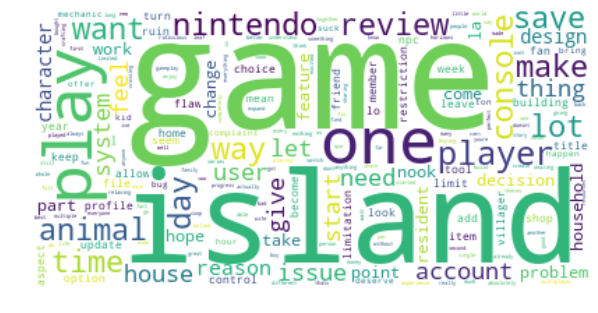

In [17]:
text = " ".join(review for review in user_hotwords['Word'])
user_wordcloud = WordCloud(background_color="white").generate(text)
fig = plt.figure(figsize = (10, 8))
plt.imshow(user_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

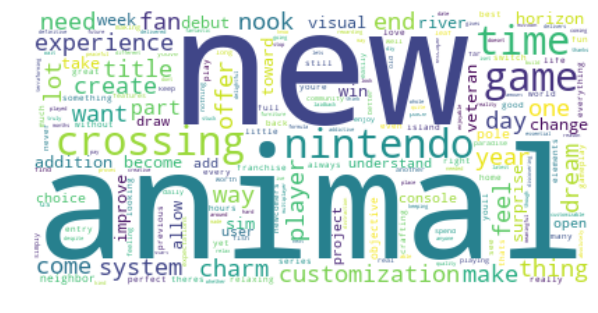

In [18]:
text = " ".join(review for review in critic_hotwords['Word'])
critic_wordcloud = WordCloud(background_color="white").generate(text)
fig = plt.figure(figsize = (10, 8))
plt.imshow(critic_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Using Word2Vec

Word2Vec expects single sentences, each one as a list of words. Thus the input format is a list of lists.

In [19]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [20]:
# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip()) # .strip removes the leading and ending spaces
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [21]:
# Preparing data for input to Word2Vec
user_sentences = []  # Initialize an empty list of sentences

for review in user_reviews["text"]:
    user_sentences += review_to_sentences(review, tokenizer)
    
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and user_reviews the model (this will take some time)
from gensim.models import word2vec
user_model = word2vec.Word2Vec(user_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to user_reviews the model any further, calling 
# init_sims will make the model much more memory-efficient.
user_model.init_sims(replace=True)

2020-05-18 17:38:37,509 : INFO : collecting all words and their counts
2020-05-18 17:38:37,510 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-18 17:38:37,571 : INFO : collected 13773 word types from a corpus of 360288 raw words and 2988 sentences
2020-05-18 17:38:37,572 : INFO : Loading a fresh vocabulary
2020-05-18 17:38:37,578 : INFO : effective_min_count=40 retains 871 unique words (6% of original 13773, drops 12902)
2020-05-18 17:38:37,580 : INFO : effective_min_count=40 leaves 312005 word corpus (86% of original 360288, drops 48283)
2020-05-18 17:38:37,583 : INFO : deleting the raw counts dictionary of 13773 items
2020-05-18 17:38:37,584 : INFO : sample=0.001 downsamples 73 most-common words
2020-05-18 17:38:37,585 : INFO : downsampling leaves estimated 203133 word corpus (65.1% of prior 312005)
2020-05-18 17:38:37,587 : INFO : estimated required memory for 871 words and 300 dimensions: 2525900 bytes
2020-05-18 17:38:37,587 : INFO : resetting la

In [22]:
user_model.most_similar('gameplay')

/Users/haley/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mechanics', 0.929079532623291),
 ('graphics', 0.9192770719528198),
 ('most', 0.917810320854187),
 ('features', 0.9075313806533813),
 ('charming', 0.8997907042503357),
 ('amazing', 0.8917742967605591),
 ('content', 0.889967679977417),
 ('almost', 0.8763418197631836),
 ('beautiful', 0.8744760751724243),
 ('best', 0.8733713030815125)]

In [25]:
user_model.most_similar('problem')

/Users/haley/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('limitation', 0.9144884347915649),
 ('issue', 0.9048488140106201),
 ('idea', 0.8983070850372314),
 ('deal', 0.8911381959915161),
 ('disappointing', 0.8618291616439819),
 ('ridiculous', 0.8424041271209717),
 ('decision', 0.8423641920089722),
 ('stupid', 0.8400448560714722),
 ('score', 0.8363338112831116),
 ('fine', 0.8267133235931396)]